#Construct Ba forcing sets

In [1]:
import sys
sys.path.insert(0, '_libs/')
import NEMO_tools as Nts
from Mat2Py import datenum2datetime, datetime2datenum 

In [2]:
import glob
import scipy.io
import datetime
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
from scipy.stats.stats import pearsonr

In [4]:
def seasonal_character(dt, data):
    '''
    =======================================================================
    bin daily data into 12 months
                            ----- created on 2014/12/25, Yingkai (Kyle) Sha
    -----------------------------------------------------------------------
        series, bin_count = seasonal_character(...)
    -----------------------------------------------------------------------
    Input:
            dt: A list of original data's datetime.datetime objects
            data: original data
    Output:
            data: data in 12 months
            bin_count: how many points fall into each months, 
                        data[i]=np.nan when bin_count[i]=0.
    ======================================================================= 
    '''
    #import datetime
    import numpy as np
    #from dateutil.relativedelta import relativedelta
    
    dt=sorted(dt) # increase order
    series=np.zeros(12)
    bin_count=np.zeros(12)
    # Bin data points
    for i in range(len(dt)):
        hit=dt[i].month
        series[hit-1] += data[i] # "-1" because it is Python
        bin_count[hit-1] += 1 # count    
    for i in range(12):
        if bin_count[i] > 0:
            series[i]=series[i]/bin_count[i]
        if bin_count[i] == 0:
            series[i]=np.nan        
    return series, bin_count

# Read data

In [5]:
MAT = scipy.io.loadmat('_data/Exchange/Ba_vs_Riverflow.mat')

In [6]:
monmean = datenum2datetime(np.squeeze(MAT['monmean_time']))
Lena_Ba = MAT['Lena_Ba'][:]; Lena_time = datenum2datetime(np.squeeze(MAT['Lena_time'])); 
Lena_discharge = MAT['Lena_discharge'][:]; Lena_discharge_monmean = MAT['Lena_discharge_monmean'][:]
Ob_Ba = MAT['Ob_Ba'][:]; Ob_time = datenum2datetime(np.squeeze(MAT['Ob_time'])); 
Ob_discharge = MAT['Ob_discharge'][:]; Ob_discharge_monmean = MAT['Ob_discharge_monmean'][:]
Kolyma_Ba = MAT['Kolyma_Ba'][:]; Kolyma_time = datenum2datetime(np.squeeze(MAT['Kolyma_time'])); 
Kolyma_discharge = MAT['Kolyma_discharge'][:]; Kolyma_discharge_monmean = MAT['Kolyma_discharge_monmean'][:]
Yenisey_Ba = MAT['Yenisey_Ba'][:]; Yenisey_time = datenum2datetime(np.squeeze(MAT['Yenisey_time'])); 
Yenisey_discharge = MAT['Yenisey_discharge'][:]; Yenisey_discharge_monmean = MAT['Yenisey_discharge_monmean'][:]
Mackenzie_Ba = MAT['Mackenzie_Ba'][:]; Mackenzie_time = datenum2datetime(np.squeeze(MAT['Mackenzie_time'])); 
Mackenzie_discharge = MAT['Mackenzie_discharge'][:]; Mackenzie_discharge_monmean = MAT['Mackenzie_discharge_monmean'][:]
Yukon_Ba = MAT['Yukon_Ba'][:]; Yukon_time = datenum2datetime(np.squeeze(MAT['Yukon_time'])); 
Yukon_discharge = MAT['Yukon_discharge'][:]; Yukon_discharge_monmean = MAT['Yukon_discharge_monmean'][:]

# Pearson correlations

## Russia river as total

In [7]:
total_Ba = np.array(list(Lena_Ba.flat) + list(Ob_Ba.flat) + list(Kolyma_Ba.flat) + list(Yenisey_Ba.flat) + list(Mackenzie_Ba.flat) + list(Yukon_Ba.flat))
total_discharge = np.array(list(Lena_discharge.flat) + list(Ob_discharge.flat) + list(Kolyma_discharge.flat) + \
                    list(Yenisey_discharge.flat) + list(Mackenzie_discharge.flat) + list(Yukon_discharge.flat))

In [8]:
russia_Ba = np.array(list(Lena_Ba.flat) + list(Ob_Ba.flat) + list(Kolyma_Ba.flat) + list(Yenisey_Ba.flat))
russia_discharge = np.array(list(Lena_discharge.flat) + list(Ob_discharge.flat) + list(Kolyma_discharge.flat) + \
                    list(Yenisey_discharge.flat))

In [9]:
corr, p = pearsonr(total_Ba, total_discharge)
print('Total\n\tNumber of data points: {}\n\tCorrelation Index: {}\n\tSignificance: {}'.format(len(total_Ba), corr, p))

Total
	Number of data points: 128
	Correlation Index: -0.252690750898
	Significance: 0.00400613446891


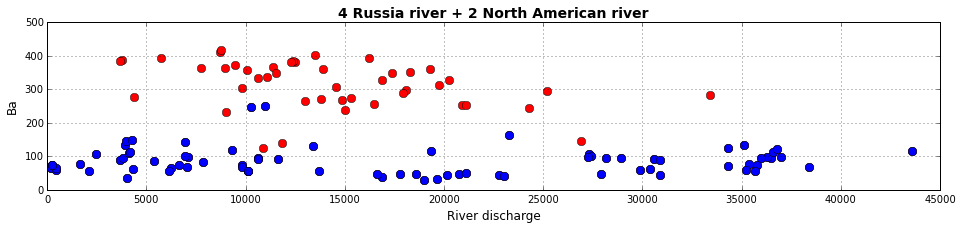

In [10]:
fig=plt.figure(figsize=(16, 3))
ax=plt.gca()
ax.plot(total_discharge, total_Ba, 'ro', markersize=8)
ax.plot(russia_discharge, russia_Ba, 'bo', markersize=8)
ax.set_ylim(0, 500); ax.set_xlim(0, 45000)
ax.set_title('4 Russia river + 2 North American river', fontsize=14, fontweight='bold')
ax.set_xlabel('River discharge', fontsize=12)
ax.set_ylabel('Ba', fontsize=12)
plt.grid()

## 6 largest river seperated

In [11]:
corr, p = pearsonr(Lena_Ba.flat, Lena_discharge.flat)
print('Lena\n\tNumber of data points: {}\n\tCorrelation Index: {}\n\tSignificance: {}'.format(len(Lena_Ba.flat), corr, p))
corr, p = pearsonr(Ob_Ba.flat, Ob_discharge.flat)
print('Lena\n\tNumber of data points: {}\n\tCorrelation Index: {}\n\tSignificance: {}'.format(len(Ob_Ba.flat), corr, p))
corr, p = pearsonr(Kolyma_Ba.flat, Kolyma_discharge.flat)
print('Kolyma\n\tNumber of data points: {}\n\tCorrelation Index: {}\n\tSignificance: {}'.format(len(Kolyma_Ba.flat), corr, p))
# Yenisey
full_list=range(len(Yenisey_Ba.flat))
black_list=[6, 10, 11, 16]
select_list=list(set(full_list)-set(black_list))
corr, p = pearsonr(Yenisey_Ba.flat[select_list], Yenisey_discharge.flat[select_list])
print('Yenisey (4 points deleted)\n\tNumber of data points: {}\n\tCorrelation Index: {}\n\tSignificance: {}'.format(len(Yenisey_Ba.flat), corr, p))
#print('\tBlack List:\n\t\t{}'.format(np.array(Yenisey_time).flat[black_list]))
corr, p = pearsonr(Mackenzie_Ba.flat, Mackenzie_discharge.flat)
print('Mackenzie\n\tNumber of data points: {}\n\tCorrelation Index: {}\n\tSignificance: {}'.format(len(Mackenzie_Ba.flat), corr, p))
corr, p = pearsonr(Yukon_Ba.flat, Yukon_discharge.flat)
print('Yukon\n\tNumber of data points: {}\n\tCorrelation Index: {}\n\tSignificance: {}'.format(len(Yukon_Ba.flat), corr, p))

Lena
	Number of data points: 23
	Correlation Index: 0.147843708504
	Significance: 0.500815148754
Lena
	Number of data points: 23
	Correlation Index: -0.497031055481
	Significance: 0.015828688295
Kolyma
	Number of data points: 13
	Correlation Index: -0.351579389874
	Significance: 0.238798214491
Yenisey (4 points deleted)
	Number of data points: 21
	Correlation Index: -0.787079918059
	Significance: 0.000177315476943
Mackenzie
	Number of data points: 23
	Correlation Index: -0.51442035801
	Significance: 0.0120257313297
Yukon
	Number of data points: 25
	Correlation Index: -0.608993449744
	Significance: 0.00123416483049


# Linear regression & plots

In [12]:
coef1_Ob = np.polyfit(Ob_discharge.flat, Ob_Ba.flat, 1)
coef1_Ye = np.polyfit(Yenisey_discharge.flat[select_list], Yenisey_Ba.flat[select_list], 1)
coef1_Ma = np.polyfit(Mackenzie_discharge.flat, Mackenzie_Ba.flat, 1)
coef1_Yu = np.polyfit(Yukon_discharge.flat, Yukon_Ba.flat, 1)

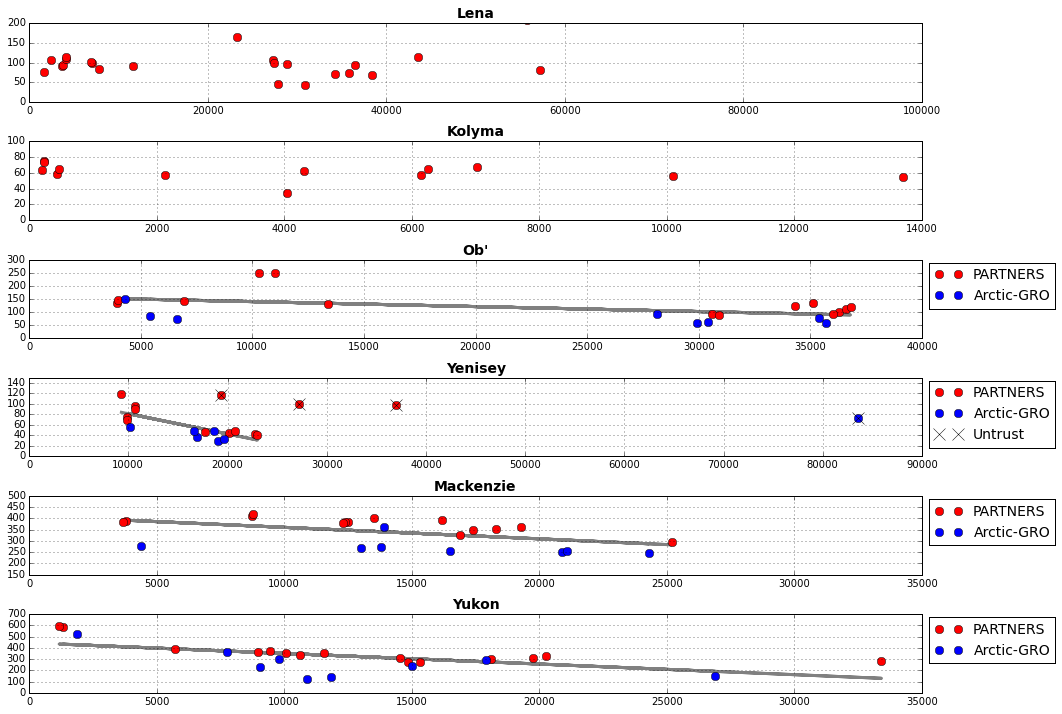

In [13]:
fig=plt.figure(figsize=(16, 12))
plt.subplots_adjust(hspace = 0.5)

ax1=plt.subplot2grid((6, 1), (0, 0), colspan=6, rowspan=1)
ax2=plt.subplot2grid((6, 1), (1, 0), colspan=6, rowspan=1)
ax3=plt.subplot2grid((6, 1), (2, 0), colspan=6, rowspan=1)
ax4=plt.subplot2grid((6, 1), (3, 0), colspan=6, rowspan=1)
ax5=plt.subplot2grid((6, 1), (4, 0), colspan=6, rowspan=1)
ax6=plt.subplot2grid((6, 1), (5, 0), colspan=6, rowspan=1)

ax1.plot(Lena_discharge.flat, Lena_Ba.flat, 'ro', markersize=8)
ax1.set_ylim(0, 200); ax1.set_xlim(0, 60000)
ax1.set_title('Lena', fontsize=14, fontweight='bold')
ax1.grid()

ax2.plot(Kolyma_discharge.flat, Kolyma_Ba.flat, 'ro', markersize=8)
ax2.set_ylim(0, 100); ax1.set_xlim(0, 100000)
ax2.set_title('Kolyma', fontsize=14, fontweight='bold')
ax2.grid()

ax3.plot(Ob_discharge.flat, Ob_discharge.flat*coef1_Ob[0]+coef1_Ob[1], color='gray', linewidth=3)
ax3.plot(Ob_discharge.flat[0:14], Ob_Ba.flat[0:14], 'ro', label='PARTNERS', markersize=8)
ax3.plot(Ob_discharge.flat[14:-1], Ob_Ba.flat[14:-1], 'bo', label='Arctic-GRO', markersize=8)
ax3.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1, 1.05))
ax3.set_ylim(0, 300); ax.set_xlim(0, 50000)
ax3.set_title("Ob'", fontsize=14, fontweight='bold')
ax3.grid()

ax4.plot(Yenisey_discharge.flat[select_list], Yenisey_discharge.flat[select_list]*coef1_Ye[0]+coef1_Ye[1], color='gray', linewidth=3)
ax4.plot(Yenisey_discharge.flat[0:13], Yenisey_Ba.flat[0:13], 'ro', label='PARTNERS', markersize=8)
ax4.plot(Yenisey_discharge.flat[13:-1], Yenisey_Ba.flat[13:-1], 'bo', label='Arctic-GRO', markersize=8)
ax4.plot(Yenisey_discharge.flat[black_list], Yenisey_Ba.flat[black_list], 'kx', label='Untrust', markersize=12)
ax4.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1, 1.05))
ax4.set_ylim(0, 150); ax4.set_xlim(0, 90000)
ax4.set_title('Yenisey', fontsize=14, fontweight='bold')
ax4.grid()

ax5.plot(Mackenzie_discharge.flat, Mackenzie_discharge.flat*coef1_Ma[0]+coef1_Ma[1], color='gray', linewidth=3)
ax5.plot(Mackenzie_discharge.flat[0:14], Mackenzie_Ba.flat[0:14], 'ro', label='PARTNERS', markersize=8)
ax5.plot(Mackenzie_discharge.flat[14:-1], Mackenzie_Ba.flat[14:-1], 'bo', label='Arctic-GRO', markersize=8)
ax5.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1, 1.05))
ax5.set_ylim(150, 500);ax5.set_xlim(0, 35000)
ax5.set_title('Mackenzie', fontsize=14, fontweight='bold')
ax5.grid()

ax6.plot(Yukon_discharge.flat, Yukon_discharge.flat*coef1_Yu[0]+coef1_Yu[1], color='gray', linewidth=3)
ax6.plot(Yukon_discharge.flat[0:15], Yukon_Ba.flat[0:15], 'ro', label='PARTNERS', markersize=8)
ax6.plot(Yukon_discharge.flat[15:-1], Yukon_Ba.flat[15:-1], 'bo', label='Arctic-GRO', markersize=8)
ax6.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1, 1.05))
ax6.set_ylim(0, 700); ax6.set_xlim(0, 35000)
ax6.set_title('Yukon', fontsize=14, fontweight='bold')
ax6.grid()

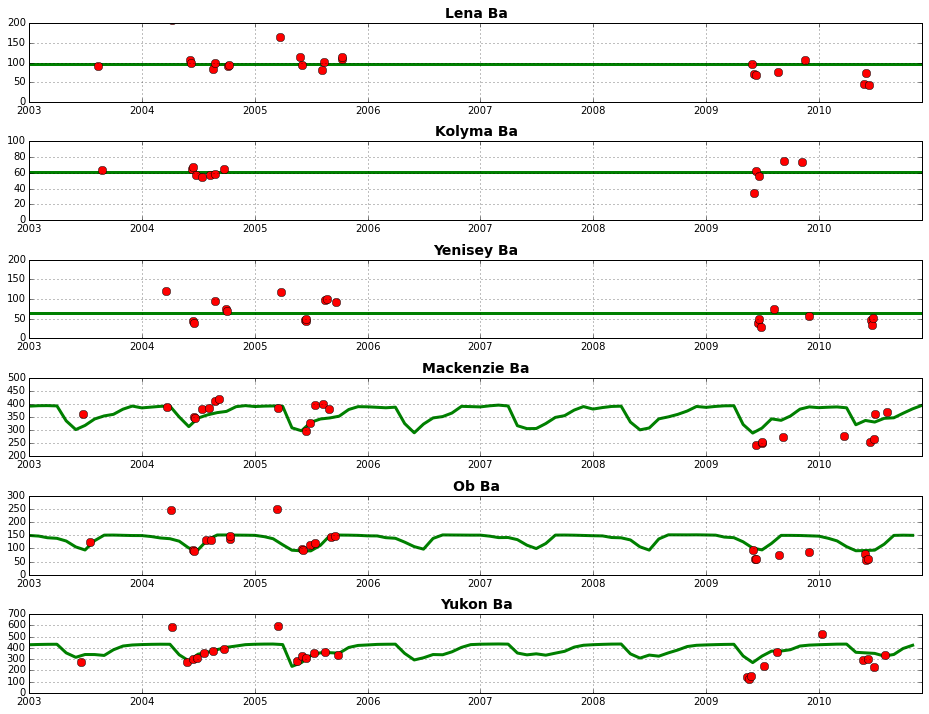

In [14]:
fig=plt.figure(figsize=(16, 12))
plt.subplots_adjust(hspace = 0.5)

ax1=plt.subplot2grid((6, 1), (0, 0), colspan=6, rowspan=1)
ax2=plt.subplot2grid((6, 1), (1, 0), colspan=6, rowspan=1)
ax3=plt.subplot2grid((6, 1), (2, 0), colspan=6, rowspan=1)
ax4=plt.subplot2grid((6, 1), (3, 0), colspan=6, rowspan=1)
ax5=plt.subplot2grid((6, 1), (4, 0), colspan=6, rowspan=1)
ax6=plt.subplot2grid((6, 1), (5, 0), colspan=6, rowspan=1)

ax1.plot(monmean, np.mean(Lena_Ba)*np.ones(len(monmean)), 'g-', linewidth=3)
ax1.plot(Lena_time, Lena_Ba.flat, 'ro', markersize=8, linewidth=2)
ax1.set_xlim(monmean[0], monmean[-1])
ax1.set_ylim(0, 200)
ax1.set_title('Lena Ba', fontsize=14, fontweight='bold')
ax1.grid()

ax2.plot(monmean, np.mean(Kolyma_Ba)*np.ones(len(monmean)), 'g-', linewidth=3)
ax2.plot(Kolyma_time, Kolyma_Ba.flat, 'ro', markersize=8, linewidth=2)
ax2.set_xlim(monmean[0], monmean[-1])
ax2.set_ylim(0, 100)
ax2.set_title('Kolyma Ba', fontsize=14, fontweight='bold')
ax2.grid()

ax3.plot(monmean, np.mean(Yenisey_Ba)*np.ones(len(monmean)), 'g-', linewidth=3)
ax3.plot(Yenisey_time, Yenisey_Ba.flat, 'ro', markersize=8, linewidth=2)
ax3.set_xlim(monmean[0], monmean[-1])
ax3.set_ylim(0, 200)
ax3.set_title('Yenisey Ba', fontsize=14, fontweight='bold')
ax3.grid()

ax4.plot(monmean, Mackenzie_discharge_monmean.flat*coef1_Ma[0] + coef1_Ma[1], linewidth=3, color='g')
ax4.plot(Mackenzie_time, Mackenzie_Ba.flat, 'ro', markersize=8, linewidth=2)
ax4.set_xlim(monmean[0], monmean[-1])
ax4.set_ylim(200, 500)
ax4.set_title('Mackenzie Ba', fontsize=14, fontweight='bold')
ax4.grid()

ax5.plot(monmean, Ob_discharge_monmean.flat*coef1_Ob[0] + coef1_Ob[1], linewidth=3, color='g')
ax5.plot(Ob_time, Ob_Ba.flat, 'ro', markersize=8, linewidth=2)
ax5.set_xlim(monmean[0], monmean[-1])
ax5.set_ylim(0, 300)
ax5.set_title('Ob Ba', fontsize=14, fontweight='bold')
ax5.grid()

ax6.plot(monmean, Yukon_discharge_monmean.flat*coef1_Yu[0]+coef1_Yu[1], linewidth=3, color='g')
ax6.plot(Yukon_time, Yukon_Ba.flat, 'ro', markersize=8, linewidth=2)
ax6.set_xlim(monmean[0], monmean[-1])
ax6.set_ylim(0, 700)
ax6.set_title('Yukon Ba', fontsize=14, fontweight='bold')
ax6.grid()

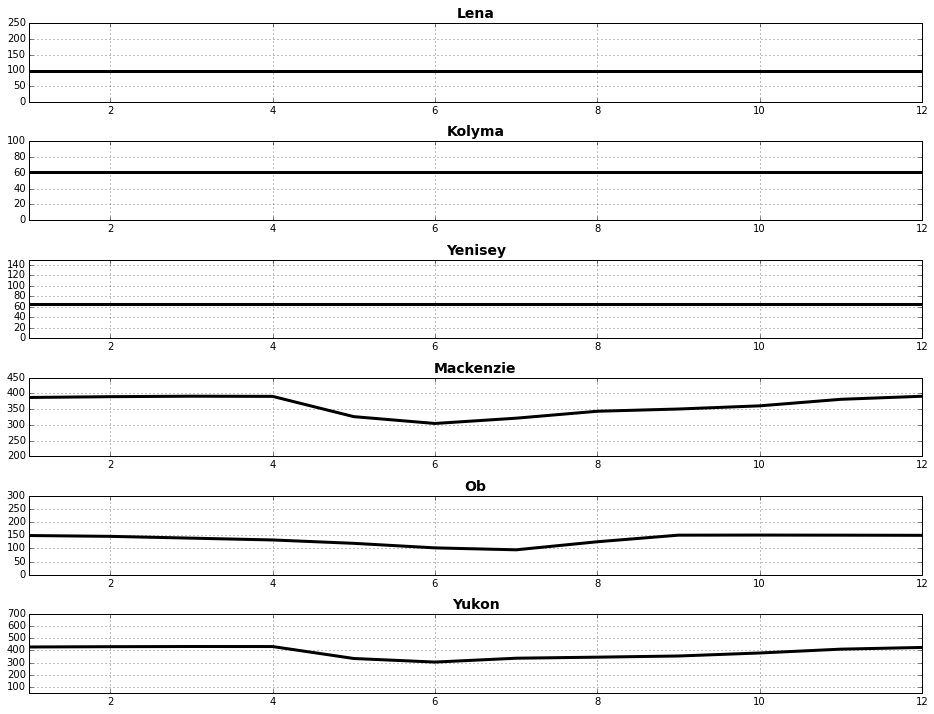

In [15]:
fig=plt.figure(figsize=(16, 12))
plt.subplots_adjust(hspace = 0.5)

Lena_forcing = np.mean(Lena_Ba)*np.ones(len(monmean))
Kolyma_forcing = np.mean(Kolyma_Ba)*np.ones(len(monmean))
Yenisey_forcing = np.mean(Yenisey_Ba)*np.ones(len(monmean))
Mackenzie_forcing = Mackenzie_discharge_monmean.flat*coef1_Ma[0] + coef1_Ma[1]
Ob_forcing = Ob_discharge_monmean.flat*coef1_Ob[0] + coef1_Ob[1]
Yukon_forcing = Yukon_discharge_monmean.flat*coef1_Yu[0]+coef1_Yu[1]

Lena_season, _ = seasonal_character(monmean, Lena_forcing)
Kolyma_season, _ = seasonal_character(monmean, Kolyma_forcing)
Yenisey_season, _ = seasonal_character(monmean, Yenisey_forcing)
Mackenzie_season, _ = seasonal_character(monmean, Mackenzie_forcing)
Ob_season, _ = seasonal_character(monmean[:-2], Ob_forcing[:-2])
Yukon_season, _ = seasonal_character(monmean[:-2], Yukon_forcing[:-2])

Lena_season, _ = seasonal_character(monmean, Lena_forcing)
Kolyma_season, _ = seasonal_character(monmean, Kolyma_forcing)
Yenisey_season, _ = seasonal_character(monmean, Yenisey_forcing)
Mackenzie_season, _ = seasonal_character(monmean, Mackenzie_forcing)
Ob_season, _ = seasonal_character(monmean[:-2], Ob_forcing[:-2])
Yukon_season, _ = seasonal_character(monmean[:-2], Yukon_forcing[:-2])

ax1=plt.subplot2grid((6, 1), (0, 0), colspan=6, rowspan=1)
ax2=plt.subplot2grid((6, 1), (1, 0), colspan=6, rowspan=1)
ax3=plt.subplot2grid((6, 1), (2, 0), colspan=6, rowspan=1)
ax4=plt.subplot2grid((6, 1), (3, 0), colspan=6, rowspan=1)
ax5=plt.subplot2grid((6, 1), (4, 0), colspan=6, rowspan=1)
ax6=plt.subplot2grid((6, 1), (5, 0), colspan=6, rowspan=1)

ax1.plot(np.arange(1, 13), Lena_season, color='k', linewidth=3)
ax1.set_xlim(1, 12); ax1.set_ylim(0, 250)
ax1.set_title('Lena', fontsize=14, fontweight='bold')
ax1.grid()

ax2.plot(np.arange(1, 13), Kolyma_season, color='k', linewidth=3)
ax2.set_xlim(1, 12); ax2.set_ylim(0, 100)
ax2.set_title('Kolyma', fontsize=14, fontweight='bold')
ax2.grid()

ax3.plot(np.arange(1, 13), Yenisey_season, color='k', linewidth=3)
ax3.set_xlim(1, 12); ax3.set_ylim(0, 150)
ax3.set_title('Yenisey', fontsize=14, fontweight='bold')
ax3.grid()

ax4.plot(np.arange(1, 13), Mackenzie_season, color='k', linewidth=3)
ax4.set_xlim(1, 12); ax4.set_ylim(200, 450)
ax4.set_title('Mackenzie', fontsize=14, fontweight='bold')
ax4.grid()

ax5.plot(np.arange(1, 13), Ob_season, color='k', linewidth=3)
ax5.set_xlim(1, 12); ax5.set_ylim(0, 300)
ax5.set_title('Ob', fontsize=14, fontweight='bold')
ax5.grid()

ax6.plot(np.arange(1, 13), Yukon_season, color='k', linewidth=3)
ax6.set_xlim(1, 12); ax6.set_ylim(50, 700)
ax6.set_title('Yukon', fontsize=14, fontweight='bold')
ax6.grid()

# Create spacial data

In [28]:
id_Ba = scipy.io.loadmat('_data/Exchange/Ba_classif.mat')
rf_Ba_group = id_Ba['rf_Ba_group'][:]
nav_lat = id_Ba['nav_lat'][:]
nav_lon = id_Ba['nav_lon'][:]

In [29]:
rf_Ba_group.shape

(149L, 182L)

In [30]:
Ba_ORCA2_2deg = np.zeros([12, 149, 182])

In [31]:
for i in range(12):
    temp = Ba_ORCA2_2deg[i, :, :]
    temp[rf_Ba_group==1] = Ob_season[i]
    temp[rf_Ba_group==2] = (Yenisey_season[i] + Lena_season[i])/2
    temp[rf_Ba_group==3] = Kolyma_season[i]
    temp[rf_Ba_group==4] = Mackenzie_season[i]
    Ba_ORCA2_2deg[i, :, :] = temp

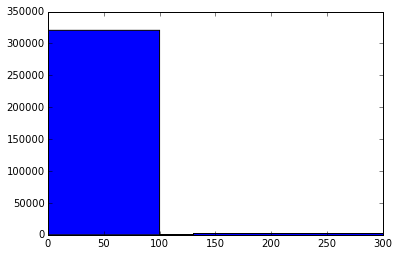

In [32]:
plt.hist(Ba_ORCA2_2deg.flatten(), bins=[0, 100, 130, 300]);

In [33]:
save_var = {'nav_lon': nav_lon, 'nav_lat': nav_lat, 'Ba_ORCA2_2deg': Ba_ORCA2_2deg}
scipy.io.savemat('_data/Exchange/Ba_ORCA2_2deg.mat', mdict=save_var)

# Create spacial data (point source)

In [130]:
ANNH4 = scipy.io.loadmat('_data/Exchange/Xianming_runoff.mat')

In [131]:
nav_lon = ANNH4['nav_lon']
nav_lat = ANNH4['nav_lat']
runoff = ANNH4['runoff']

In [132]:
river_name = ['Pechora', 'Ob + Pur', 'Yenisey', 'Olenek', 'Yana', 'Indigirka', 'Kolyma', 'Mackenzie', 'Sev. Dvina', 'Lena', 'Khatanga', 'Taimyra', 'Pyasina']
lons = np.array([52, 66, 88, 123, 136, 148, 159, -135, 42, 127, 103, 100, 88])
lats = np.array([67, 67, 70, 72, 71, 70, 69, 68, 65, 73, 72, 76, 72])

In [133]:
from scipy.spatial import cKDTree

def do_kdtree(nav_lon, nav_lat, lons, lats):
    #
    combined_x_y_arrays = np.dstack([nav_lon.ravel(), nav_lat.ravel()])[0]
    points_list = list(np.array([lons.T, lats.T]).T)
    #
    mytree = cKDTree(combined_x_y_arrays)
    dist, index_flat = mytree.query(points_list)
    x, y = np.unravel_index(index_flat, nav_lon.shape)
    return x, y

x_index, y_index = do_kdtree(nav_lon, nav_lat, lons, lats)

In [134]:
nav_lat[x_index, y_index]

array([ 66.45815277,  67.29354858,  69.61828613,  71.39181519,
        70.65473175,  69.1049881 ,  69.23775482,  67.88497925,
        65.40821075,  73.37249756,  71.88396454,  75.03630066,  72.32976532], dtype=float32)

In [135]:
nav_lon[x_index, y_index]

array([  51.85961151,   65.75476074,   88.9392395 ,  123.87884521,
        136.45018005,  148.08734131,  159.61489868, -134.67964172,
         42.10388184,  126.1632309 ,  102.27970886,  100.06124878,
         87.84056854], dtype=float32)

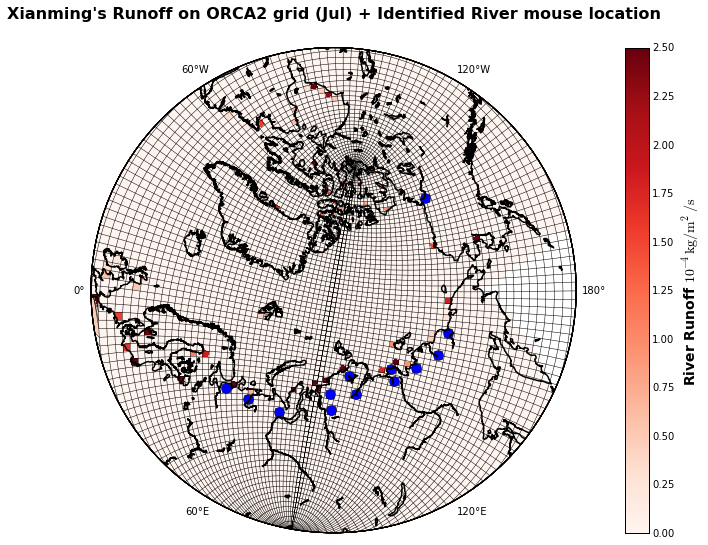

In [136]:
CMap=plt.cm.Reds #cm.GMT_seis_r
var_name='River Runoff $\mathrm{10^{-4} kg/m^2/s}$'
rf_id_interp_masked=np.ma.masked_where(np.isnan(runoff[7, :, :]), runoff[7, :, :])
#
fig, ax, proj = Nts.pcolor_Arctic(nav_lon, nav_lat, 50, rf_id_interp_masked, [0, 2.5], CMap, var_name, hit=0)
#
title="Xianming's Runoff on ORCA2 grid (Jul) + Identified River mouse location"
ax.set_title(title, fontsize=16, fontweight='bold', y=1.05)
fig.set_size_inches(10, 10)
#
x, y=proj(nav_lon, nav_lat)
proj.plot(x.T, y.T, color='k', linewidth=0.5)
proj.plot(x, y, color='k', linewidth=0.5)
#i = 9
#proj.plot(x[x_index[i], y_index[i]], y[x_index[i], y_index[i]], 'bo', markersize=10)
proj.plot(x[x_index, y_index], y[x_index, y_index], 'bo', markersize=10)
fig.canvas.draw()

In [137]:
str(river_name[i])

'Lena'

In [138]:
addoffsets = [[0,-2], [1, -5], [3-1, 6-1], [1, 4], [2, 0], [2, 3], [1, 1], [+2, -2], [2, -2], [0, 1], [-2, +5], [-2, +4], [-1, 6]]
x_index_fixed = np.empty(np.size(x_index))
y_index_fixed = np.empty(np.size(y_index))
for i in range(13):
    x_index_fixed[i] = x_index[i] + addoffsets[i][0]
    y_index_fixed[i] = y_index[i] + addoffsets[i][1]
x_index_fixed = x_index_fixed.astype(np.int)
y_index_fixed = y_index_fixed.astype(np.int)

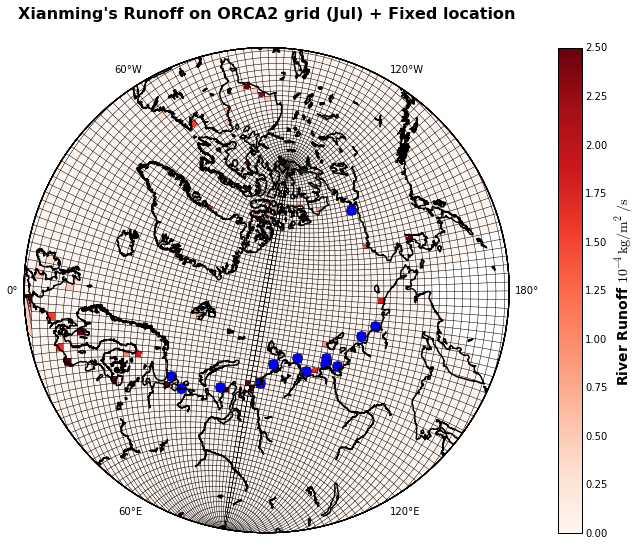

In [139]:
CMap=plt.cm.Reds #cm.GMT_seis_r
var_name='River Runoff $\mathrm{10^{-4} kg/m^2/s}$'
rf_id_interp_masked=np.ma.masked_where(np.isnan(runoff[7, :, :]), runoff[7, :, :])
#
fig, ax, proj = Nts.pcolor_Arctic(nav_lon, nav_lat, 50, rf_id_interp_masked, [0, 2.5], CMap, var_name, hit=0)
#
title="Xianming's Runoff on ORCA2 grid (Jul) + Fixed location"
ax.set_title(title, fontsize=16, fontweight='bold', y=1.05)
fig.set_size_inches(10, 10)
#
x, y=proj(nav_lon, nav_lat)
proj.plot(x.T, y.T, color='k', linewidth=0.5)
proj.plot(x, y, color='k', linewidth=0.5)
#i = 9
#proj.plot(x[x_index_fixed[i], y_index_fixed[i]], y[x_index_fixed[i], y_index_fixed[i]], 'bo', markersize=10)
proj.plot(x[x_index_fixed, y_index_fixed], y[x_index_fixed, y_index_fixed], 'bo', markersize=10)
fig.canvas.draw()

# Add Ba source by modifying runoff file

12 monthes × 149 × 182

In [140]:
runoff.shape

(12L, 149L, 182L)

In [141]:
print(river_name)

['Pechora', 'Ob + Pur', 'Yenisey', 'Olenek', 'Yana', 'Indigirka', 'Kolyma', 'Mackenzie', 'Sev. Dvina', 'Lena', 'Khatanga', 'Taimyra', 'Pyasina']


In [142]:
Ba_ORCA2_2deg = np.zeros(runoff.shape)
Ba_ORCA2_2deg[np.isnan(runoff)]=np.nan
Ba_ORCA2_2deg[:, x_index_fixed[1], y_index_fixed[1]]=Ob_season
Ba_ORCA2_2deg[:, x_index_fixed[2], y_index_fixed[2]]=Yenisey_season
Ba_ORCA2_2deg[:, x_index_fixed[6], y_index_fixed[6]]=Kolyma_season
Ba_ORCA2_2deg[:, x_index_fixed[7], y_index_fixed[7]]=Mackenzie_season
Ba_ORCA2_2deg[:, x_index_fixed[9], y_index_fixed[9]]=Lena_season

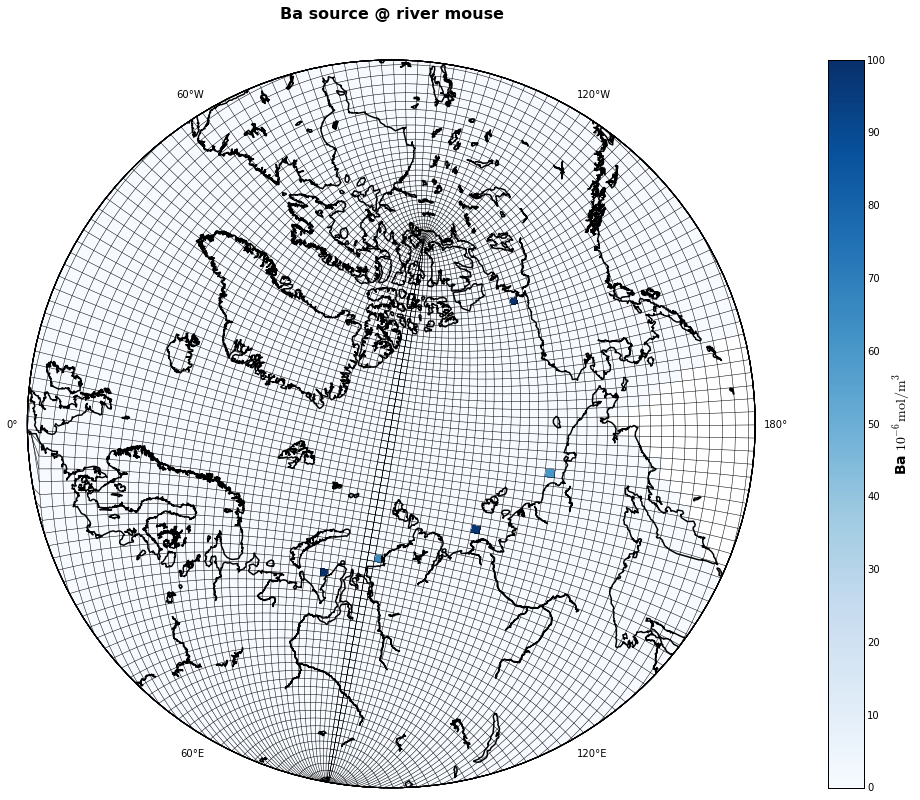

In [143]:
CMap=plt.cm.Blues #cm.GMT_seis_r
var_name='Ba $\mathrm{10^{-6} mol/m^3}$'
Ba_id_interp_masked=np.ma.masked_where(np.isnan(Ba_ORCA2_2deg[7, :, :]), Ba_ORCA2_2deg[7, :, :])
#
fig, ax, proj = Nts.pcolor_Arctic(nav_lon, nav_lat, 50, Ba_id_interp_masked, [0, 100], CMap, var_name, hit=0)
#
title="Ba source @ river mouse"
ax.set_title(title, fontsize=16, fontweight='bold', y=1.05)
fig.set_size_inches(15, 15)
#
x, y=proj(nav_lon, nav_lat)
proj.plot(x.T, y.T, color='k', linewidth=0.5)
proj.plot(x, y, color='k', linewidth=0.5)
fig.canvas.draw()

# Save data

In [150]:
save_var = {'nav_lon': nav_lon, 'nav_lat': nav_lat, 'Ba_ORCA2_2deg': Ba_ORCA2_2deg}
scipy.io.savemat('_data/Exchange/Ba_ORCA2_2deg.mat', mdict=save_var)

In [151]:
glob.glob('_data/Exchange/Ba_ORCA2_2deg.mat')

['_data/Exchange/Ba_ORCA2_2deg.mat']